In [1]:
import lfw_dataset as lfw
X_train, y_train, X_test, y_test = lfw.load_data()


Data already exist


images are same person


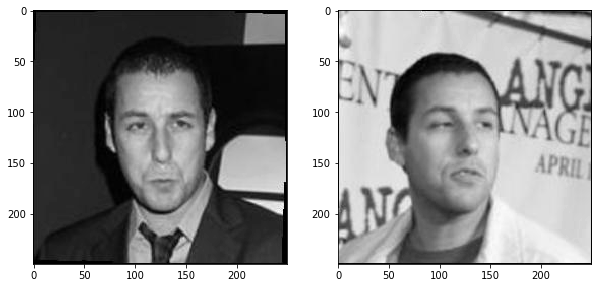

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# lets check that same images are really same person and vise versa
random_index = np.random.randint(0, len(y_train))

print('images are {} person'.format('same' if y_train[random_index] == 1 else 'not same'))

f, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(X_train[0][random_index].squeeze(),cmap='gray')
ax[1].imshow(X_train[1][random_index].squeeze(),cmap='gray')


In [3]:
from siamese import Siamese

s_net = Siamese(X_train, y_train)

In [4]:
model_obj = s_net.init_network()


TypeError: W_init() got an unexpected keyword argument 'dtype'

In [ ]:
model_obj.summary()

In [6]:
history = model_obj.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=.2, verbose=True)

Train on 1760 samples, validate on 440 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1760/1760 [==============================] - 109s 62ms/sample - loss: 5.9027 - acc: 0.6187 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/10
1760/1760 [==============================] - 113s 64ms/sample - loss: 5.9784 - acc: 0.6250 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 3/10
1760/1760 [==============================] - 123s 70ms/sample - loss: 5.9784 - acc: 0.6250 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 4/10
1760/1760 [==============================] - 110s 63ms/sample - loss: 5.9784 - acc: 0.6250 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 5/10
1760/1760 [==============================] - 110s 62ms/sample - loss: 5.9784 - acc: 0.6250 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 6/10
1760/1760 [==============================] - 110s 63ms/sample - loss: 5.9784 - acc: 0.6250 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 7/10
1760/1760 [===================

In [7]:
def evaluate(model, history, X_test, y_test):
    model.summary()
    loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

    fig, axes = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    # plot accuracy 
    axes[0].plot(history.history['acc'])
    axes[0].plot(history.history['val_acc'])
    axes[0].set_title('model accuracy')
    axes[0].set_ylabel('accuracy')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['training', 'validation'], loc='best')

    # plot loss
    axes[1].plot(history.history['loss'])
    axes[1].plot(history.history['val_loss'])
    axes[1].set_title('model loss')
    axes[1].set_ylabel('accuracy')
    axes[1].set_xlabel('epoch')
    axes[1].legend(['training', 'validation'], loc='best')


    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')#%%


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 50)           5722754     input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           sequential[1][0]                 
          

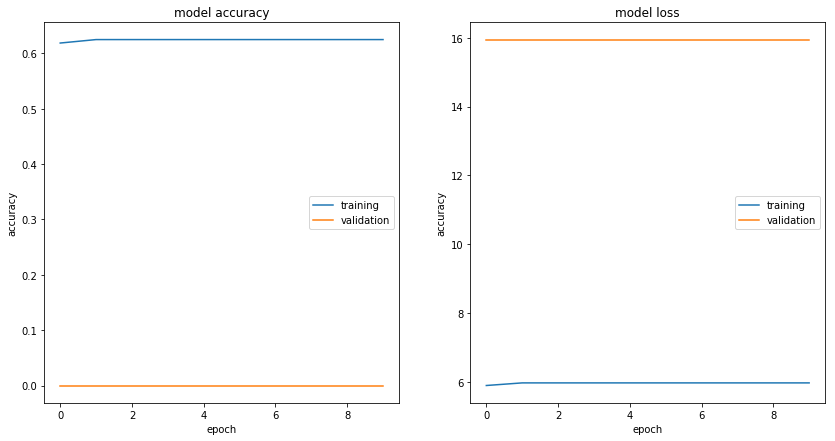

In [8]:
evaluate(model_obj, history, X_test, y_test)
